In [1]:
import pandas as pd
from glob import glob

In [2]:
file = glob(r'Uber Data/*.csv')
data = []
for f in file:
    df = pd.read_csv(f)
    data.append(df)

In [3]:
df = pd.concat(data)
df.to_csv('Uber Data/Uber.csv',index=False)

In [4]:
mydf = pd.read_csv('Uber Data/Uber.csv')

In [5]:
mydf.head()

,Date/Time,Lat,Lon,Base
0,2014/4/1 00:11:00,40.7690,-73.9549,B02512
1,2014/4/1 00:17:00,40.7267,-74.0345,B02512
2,2014/4/1 00:21:00,40.7316,-73.9873,B02512
3,2014/4/1 00:28:00,40.7588,-73.9776,B02512
4,2014/4/1 00:33:00,40.7594,-73.9722,B02512


In [6]:
mydf.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [7]:
shape = mydf.shape
print('Rows'+str(shape[0]) +'\n'+'Column'+str(shape[1]))

Rows393210
Column4


In [8]:
mydf['Date/Time'] = pd.to_datetime(mydf['Date/Time'])

In [9]:
mydf['Time'] = mydf['Date/Time'].dt.time

In [10]:
mydf['Month'] = mydf['Date/Time'].dt.month_name()

In [11]:
mydf['Year'] = mydf['Date/Time'].dt.year

In [12]:
mydf['Day of Week'] = mydf['Date/Time'].dt.day_name()

In [13]:
mydf['Hour'] = mydf['Date/Time'].dt.hour

In [14]:
mydf['Minute'] = mydf['Date/Time'].dt.minute

In [15]:
mydf['Second'] = mydf['Date/Time'].dt.second

In [16]:
mydf['Day'] = mydf['Date/Time'].dt.day

In [17]:
mydf.head()

,Date/Time,Lat,Lon,Base,Time,Month,Year,Day of Week,Hour,Minute,Second,Day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00,April,2014,Tuesday,0,11,0,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00,April,2014,Tuesday,0,17,0,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00,April,2014,Tuesday,0,21,0,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00,April,2014,Tuesday,0,28,0,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00,April,2014,Tuesday,0,33,0,1


In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [19]:
hour_count = mydf['Hour'].value_counts().sort_index()

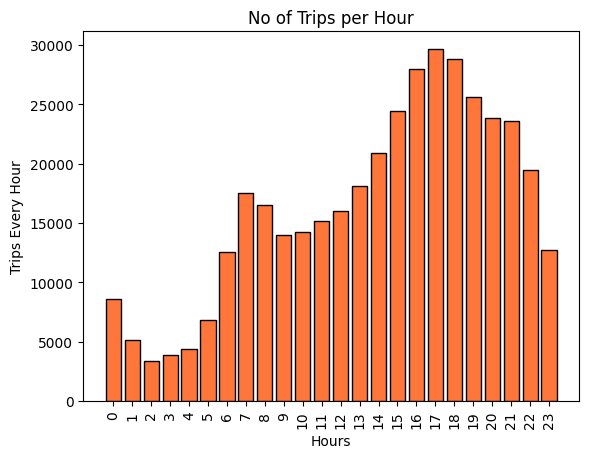

In [20]:
plt.bar(hour_count.index,hour_count.values,color = '#FF763A',edgecolor = 'black')
plt.title('No of Trips per Hour')
plt.xticks(hour_count.index,rotation='vertical')
plt.xlabel('Hours')
plt.ylabel('Trips Every Hour')
plt.show()

<Figure size 1200x800 with 0 Axes>

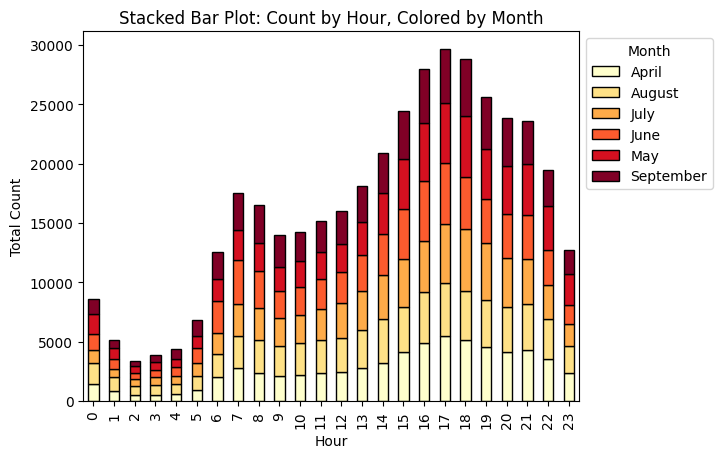

In [21]:
hourly_totals = mydf.groupby(['Hour', 'Month']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
hourly_totals.plot(kind='bar', stacked=True, colormap='YlOrRd',edgecolor = 'black')
plt.title('Stacked Bar Plot: Count by Hour, Colored by Month')
plt.xlabel('Hour')
plt.ylabel('Total Count')
plt.legend(title='Month', bbox_to_anchor=(1, 1))
plt.show()

In [22]:
day_count = mydf.groupby('Day').size()

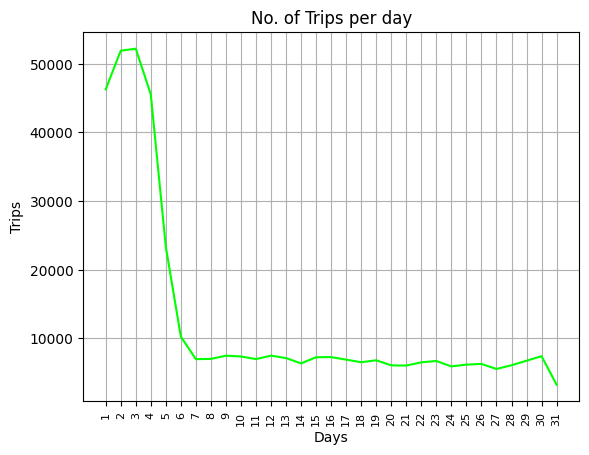

In [23]:
plt.plot(day_count.index,day_count.values,color = '#00FF00')
plt.xticks(day_count.index,rotation = 'vertical',size=8)
plt.xlabel("Days")
plt.ylabel("Trips")
plt.title('No. of Trips per day')
plt.grid()
plt.show()

<Figure size 1200x800 with 0 Axes>

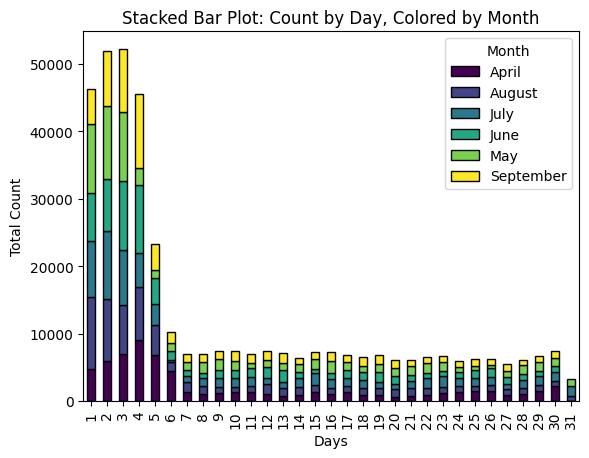

In [24]:
day_totals = mydf.groupby(['Day', 'Month']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
day_totals.plot(kind='bar', stacked=True, colormap='viridis',edgecolor = 'black')
plt.title('Stacked Bar Plot: Count by Day, Colored by Month')
plt.xlabel('Days')
plt.ylabel('Total Count')
plt.legend(title='Month', bbox_to_anchor=(1, 1))
plt.show()

In [25]:
month_count = mydf.groupby('Day of Week').size()
print(month_count)

Day of Week
Friday       65849
Monday       43627
Saturday     52159
Sunday       38233
Thursday     68227
Tuesday      61884
Wednesday    63231
dtype: int64


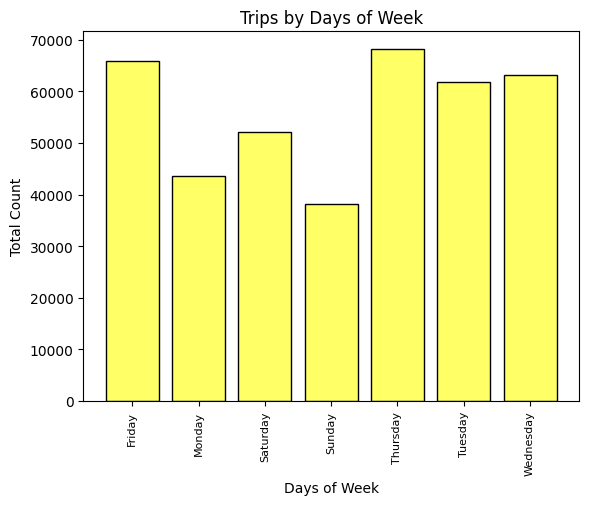

In [26]:
#plotting
plt.bar(month_count.index,month_count.values,color = '#FFFF66',edgecolor='black')
plt.xticks(month_count.index,rotation = 'vertical',size = 8)
plt.xlabel('Days of Week')
plt.ylabel('Total Count')
plt.title('Trips by Days of Week')
plt.show()

<Figure size 1200x800 with 0 Axes>

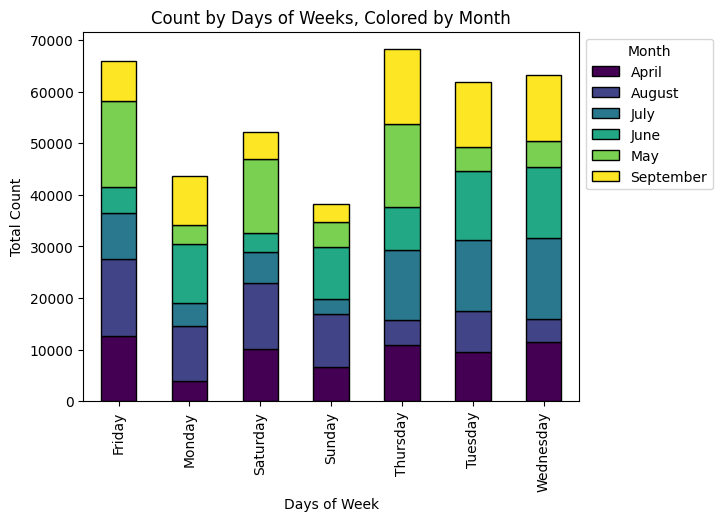

In [27]:
dayofweek_totals = mydf.groupby(['Day of Week', 'Month']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
dayofweek_totals.plot(kind='bar', stacked=True, colormap='viridis',edgecolor='black')
plt.title('Count by Days of Weeks, Colored by Month')
plt.xlabel('Days of Week')
plt.ylabel('Total Count')
plt.legend(title='Month', bbox_to_anchor=(1, 1))
plt.show()

In [28]:
Base_count = mydf.groupby('Base').size()

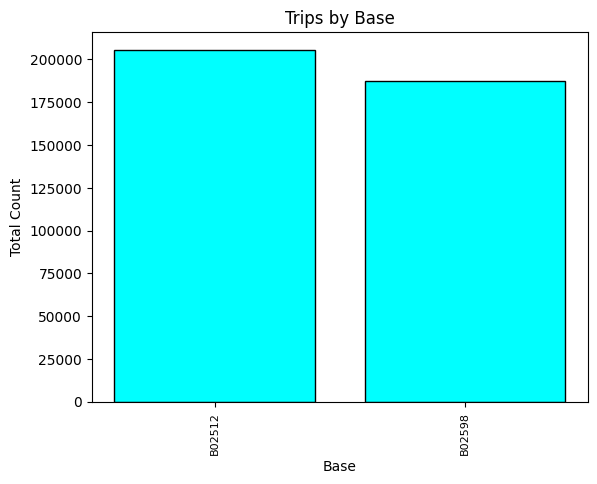

In [29]:
#plotting
plt.bar(Base_count.index,Base_count.values,color = 'cyan',edgecolor = 'black')
plt.xticks(Base_count.index,rotation = 'vertical',size = 8)
plt.xlabel('Base')
plt.ylabel('Total Count')
plt.title('Trips by Base')
plt.show()

In [30]:

Base_Totals = mydf.groupby(['Base', 'Month']).size().reset_index(name='Total')
print(Base_Totals)

      Base      Month  Total
0   B02512      April  35536
1   B02512     August  31472
2   B02512       July  35021
3   B02512       June  32509
4   B02512        May  36765
5   B02512  September  34370
6   B02598      April  29999
7   B02598     August  34063
8   B02598       July  30514
9   B02598       June  33026
10  B02598        May  28770
11  B02598  September  31165


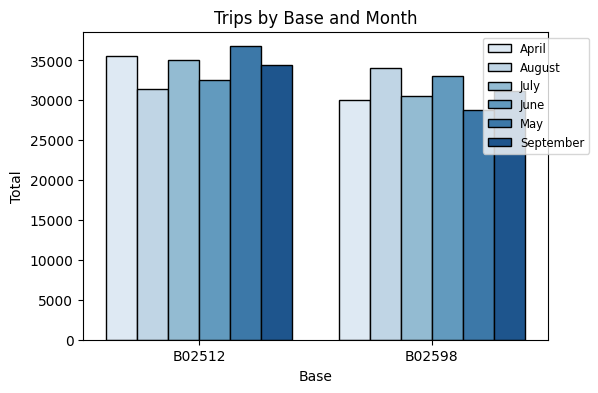

In [31]:
# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x='Base', y='Total', hue='Month', data = Base_Totals, palette='Blues',edgecolor = 'black')
plt.title('Trips by Base and Month')
plt.xlabel('Base')
plt.legend( loc='upper right', bbox_to_anchor=(1.1, 1),fontsize= 'small')
plt.ylabel('Total')
plt.show()

In [32]:
geo_df = mydf[['Lat','Lon']]

In [33]:
#Heat Maps

In [34]:
data = mydf.groupby(['Hour','Day']).size().unstack().fillna(0)
print(data)

Day     1     2     3     4     5    6    7    8    9    10  ...   22   23  \
Hour                                                         ...             
0     1113   818  1189  1100   872  632  146  104   87  123  ...   82   92   
1      690   552   739   623   456  389   79   62   54   65  ...   51   49   
2      436   365   447   447   328  218   60   41   44   48  ...   30   31   
3      489   521   510   518   395  144   55   56   50   61  ...   58   48   
4      490   654   550   615   485  118   68   71   61   48  ...   70   60   
5      765   992   809   848   825  143   99  116  140  100  ...  109  103   
6     1265  1715  1472  1582  1438  237  210  263  292  207  ...  214  207   
7     1924  2373  2021  2035  1859  298  247  364  371  275  ...  296  293   
8     1892  2246  1880  1915  1741  318  269  321  343  274  ...  274  247   
9     1667  1737  1647  1629  1126  341  228  266  289  264  ...  223  200   
10    1631  1737  1701  1581   843  392  277  274  304  279  ...

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
day_and_hour = mydf.groupby(['Day', 'Hour']).size().reset_index(name='Total')

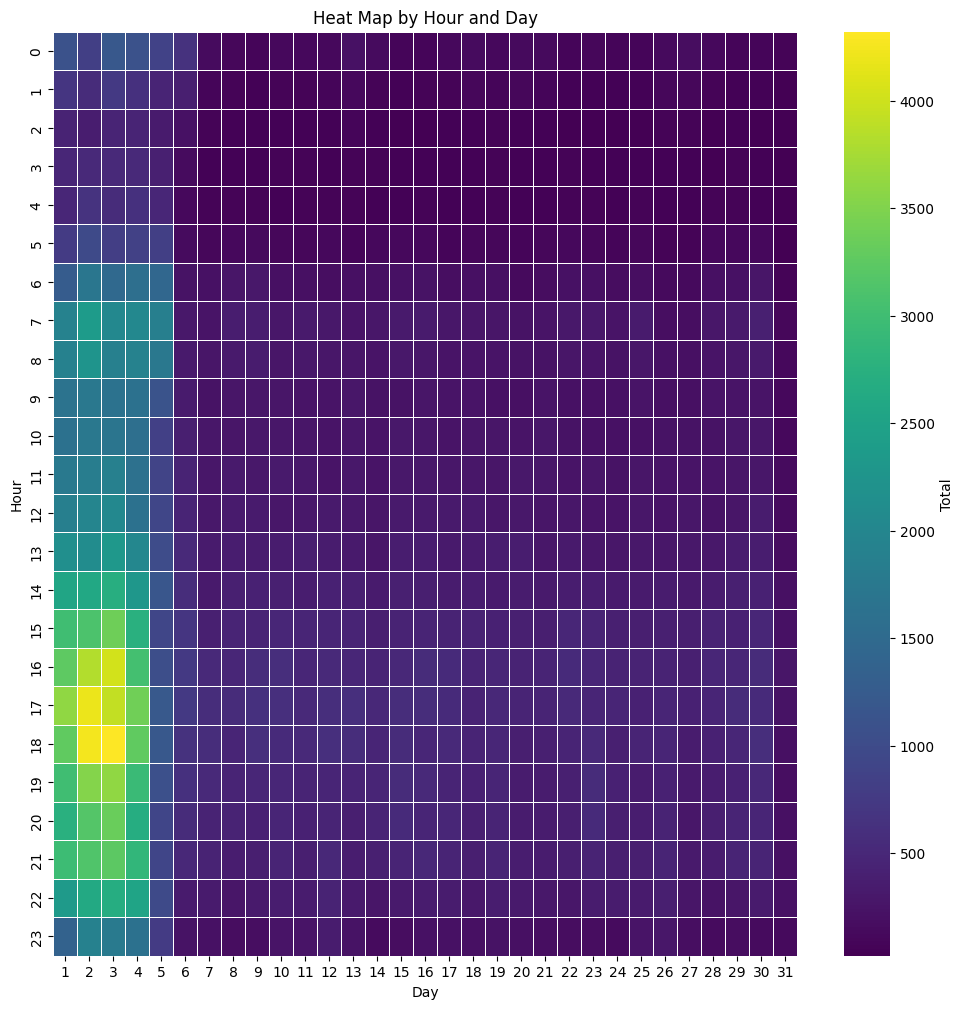

In [37]:
heatmap_data = day_and_hour.pivot(index='Hour', columns='Day', values='Total')
plt.figure(figsize=(12, 12))
sns.heatmap(heatmap_data, cmap='viridis', fmt='d', linewidths=.5, cbar_kws={"label": "Total"})
plt.title("Heat Map by Hour and Day")
plt.show()


In [38]:
month_and_day = mydf.groupby(['Month', 'Day']).size().reset_index(name='Total')

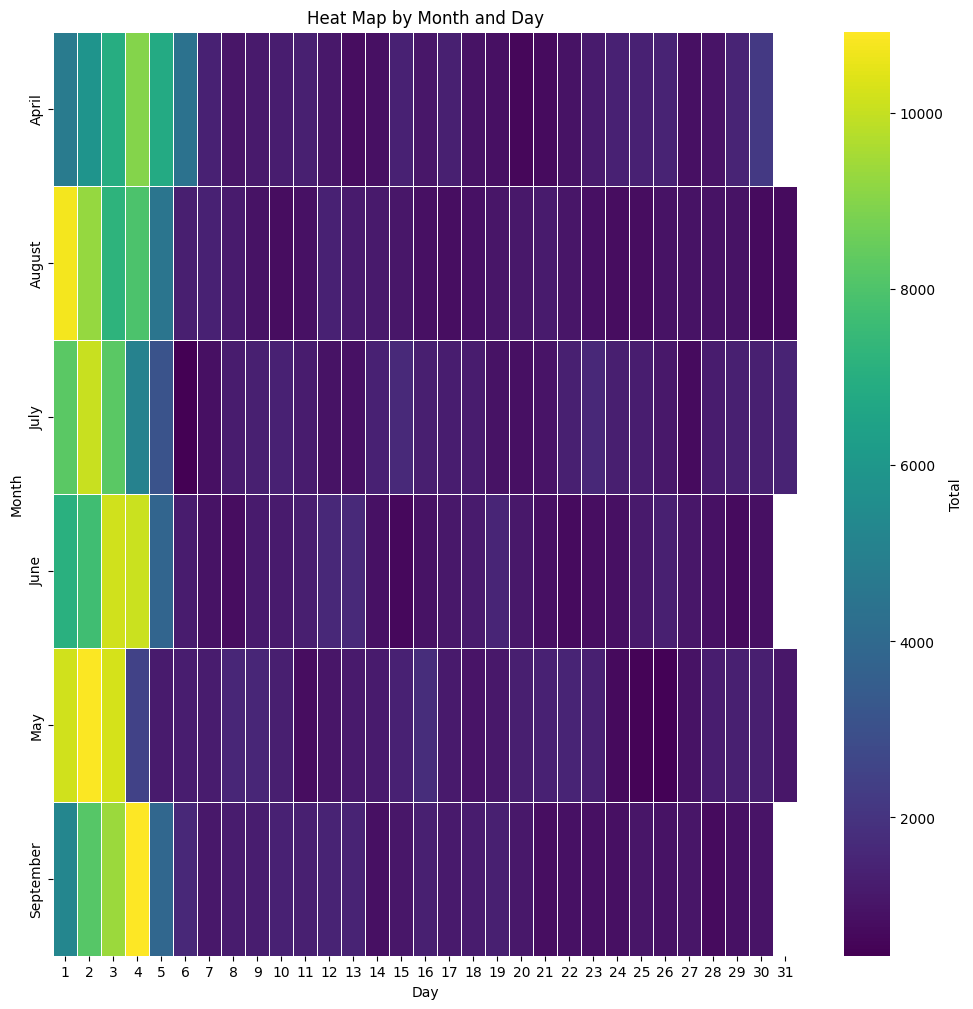

In [39]:
heatmap_data = month_and_day.pivot(index='Month', columns='Day', values='Total')
plt.figure(figsize=(12, 12))
sns.heatmap(heatmap_data, cmap='viridis', fmt='d', linewidths=.5, cbar_kws={"label": "Total"})
plt.title("Heat Map by Month and Day")
plt.show()


In [40]:
Month_Day_of_Week = mydf.groupby(['Month','Day of Week']).size().reset_index(name = 'Total')

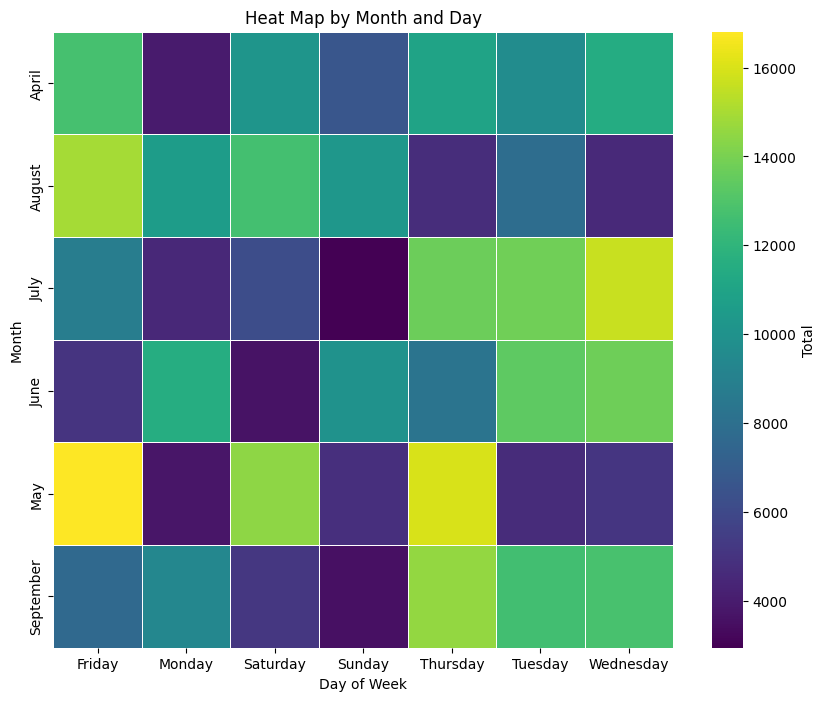

In [41]:
heatmap_data = Month_Day_of_Week.pivot(index='Month', columns='Day of Week', values='Total')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis', fmt='d', linewidths=.5, cbar_kws={"label": "Total"})
plt.title("Heat Map by Month and Day")
plt.show()


In [42]:
Month_Base = mydf.groupby(['Month','Base']).size().reset_index(name = 'Total')

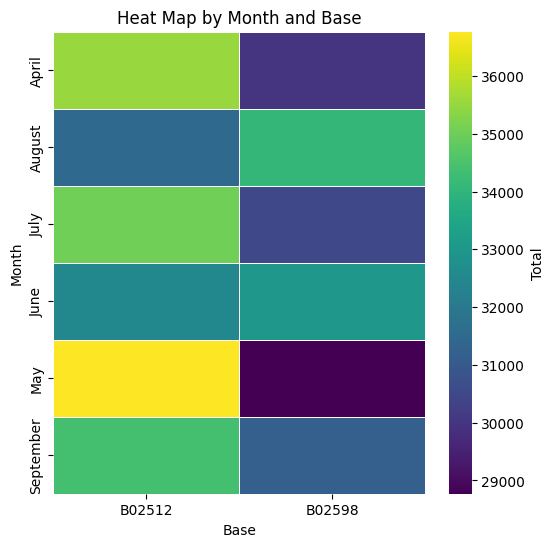

In [43]:
heatmap_data = Month_Base.pivot(index = 'Month',columns='Base',values='Total')
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data, cmap='viridis', fmt='d', linewidths=.5, cbar_kws={"label": "Total"})
plt.title("Heat Map by Month and Base")
plt.show()


In [44]:
import geopandas as gpd
from shapely.geometry import Point

In [45]:
min_lat = 40.5774
max_lat = 40.9176
min_long = -74.15
max_long = -73.7004


In [46]:
# Create a GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(df['Lon'], df['Lat'])]
gdf = gpd.GeoDataFrame(geometry=geometry)


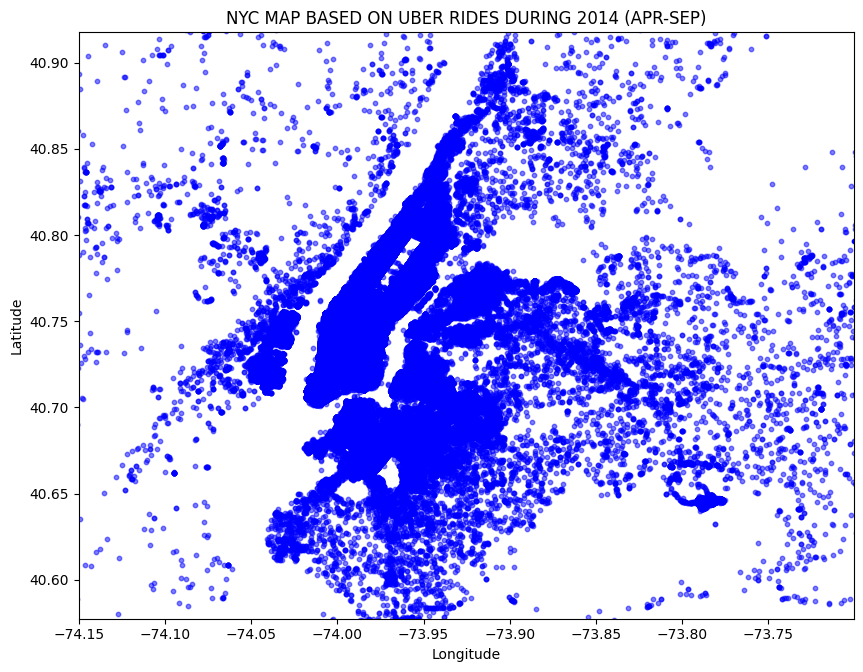

In [48]:

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 9))
gdf.plot(ax=ax, markersize=10, color='blue', alpha=0.5)

# Set x-axis and y-axis limits
ax.set_xlim(min_long, max_long)
ax.set_ylim(min_lat, max_lat)

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP)')

plt.show()